# Med Sea Trajectories — First Steps

We'll use this dataset: https://doi.org/10.5281/zenodo.4650317

## Tech preamble

In [1]:
from pathlib import Path
import pooch
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

## Parameters

In [2]:
# parameters
data_path = "./data/"
doi = "10.5281/zenodo.4650317"
file_name_csv = "trajectories_stokes_subset_10000.csv.gz"
file_name_nc = "trajectories_stokes_subset_10000.nc"

In [3]:
# ensure we don't track the downloaded data with Git
!echo "*" > {data_path}/.gitignore

## Load data

In [4]:
Path(data_path).mkdir(exist_ok=True, parents=True)

In [5]:
file_path_csv = pooch.retrieve(url=f"doi:{doi}/{file_name_csv}", known_hash=None, path=data_path)
file_path_nc = pooch.retrieve(url=f"doi:{doi}/{file_name_nc}", known_hash=None, path=data_path)

In [6]:
data_frame  = pd.read_csv(file_path_csv, parse_dates=[8, ])
display(data_frame)

,obs,traj,MPA,distance,land,lat,lon,temp,time,z
0,0,0,1.0,0.00000,0.000000,43.288517,5.171321,13.421764,2017-03-01,1.018237
1,0,1,1.0,0.00000,0.000000,43.296562,4.982898,12.984367,2017-03-05,1.018237
2,0,2,1.0,0.00000,0.000000,43.294650,4.962841,13.468207,2017-03-10,1.018237
3,0,3,1.0,0.00000,0.000000,43.280422,5.100956,13.317587,2017-03-14,1.018237
4,0,4,1.0,0.00000,0.000000,43.294853,5.134313,13.718286,2017-03-19,1.018237
...,...,...,...,...,...,...,...,...,...,...
9640197,961,10016,0.0,224.19990,0.000000,36.162086,-3.202770,25.775387,2017-08-30,1.018237
9640198,961,10017,0.0,618.48180,0.000000,36.503100,-0.975374,25.487108,2017-09-01,1.018237
9640199,961,10018,9.0,25.93396,0.999937,36.776940,-2.083331,0.001617,2017-09-03,1.018237
9640200,961,10019,10.0,46.12833,0.989197,36.853718,-2.409404,0.280338,2017-09-05,1.018237


In [7]:
data_set  = xr.open_dataset(file_path_nc)
display(data_set)

<xarray.Dataset>
Dimensions:   (traj: 10021, obs: 962)
Dimensions without coordinates: traj, obs
Data variables:
    MPA       (traj, obs) float32 ...
    distance  (traj, obs) float32 ...
    land      (traj, obs) float32 ...
    lat       (traj, obs) float32 ...
    lon       (traj, obs) float32 ...
    temp      (traj, obs) float32 ...
    time      (traj, obs) datetime64[ns] ...
    z         (traj, obs) float32 ...
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        2.0.0b3.dev74+g9ee0f7f

## Have a look

### All* locations with single trajectory highlighted

*) first 1000 trajs

<AxesSubplot:xlabel='lon', ylabel='lat'>

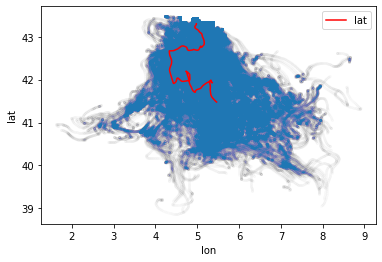

In [8]:
ax = data_frame[data_frame["traj"] < 1000].plot.scatter(x="lon", y="lat", s=5, alpha=0.002)
data_frame.sort_values(["traj", "obs"]).set_index(["traj", "obs"]).loc[111].plot.line(
    x="lon", y="lat", color="red", ax=ax
)

### Weekly groupings

In [9]:
import tqdm

In [10]:
weeks = data_frame.time.dt.isocalendar().week
n_weeks = len(weeks.unique())

100%|███████████████████████████████████████████| 28/28 [00:04<00:00,  6.80it/s]


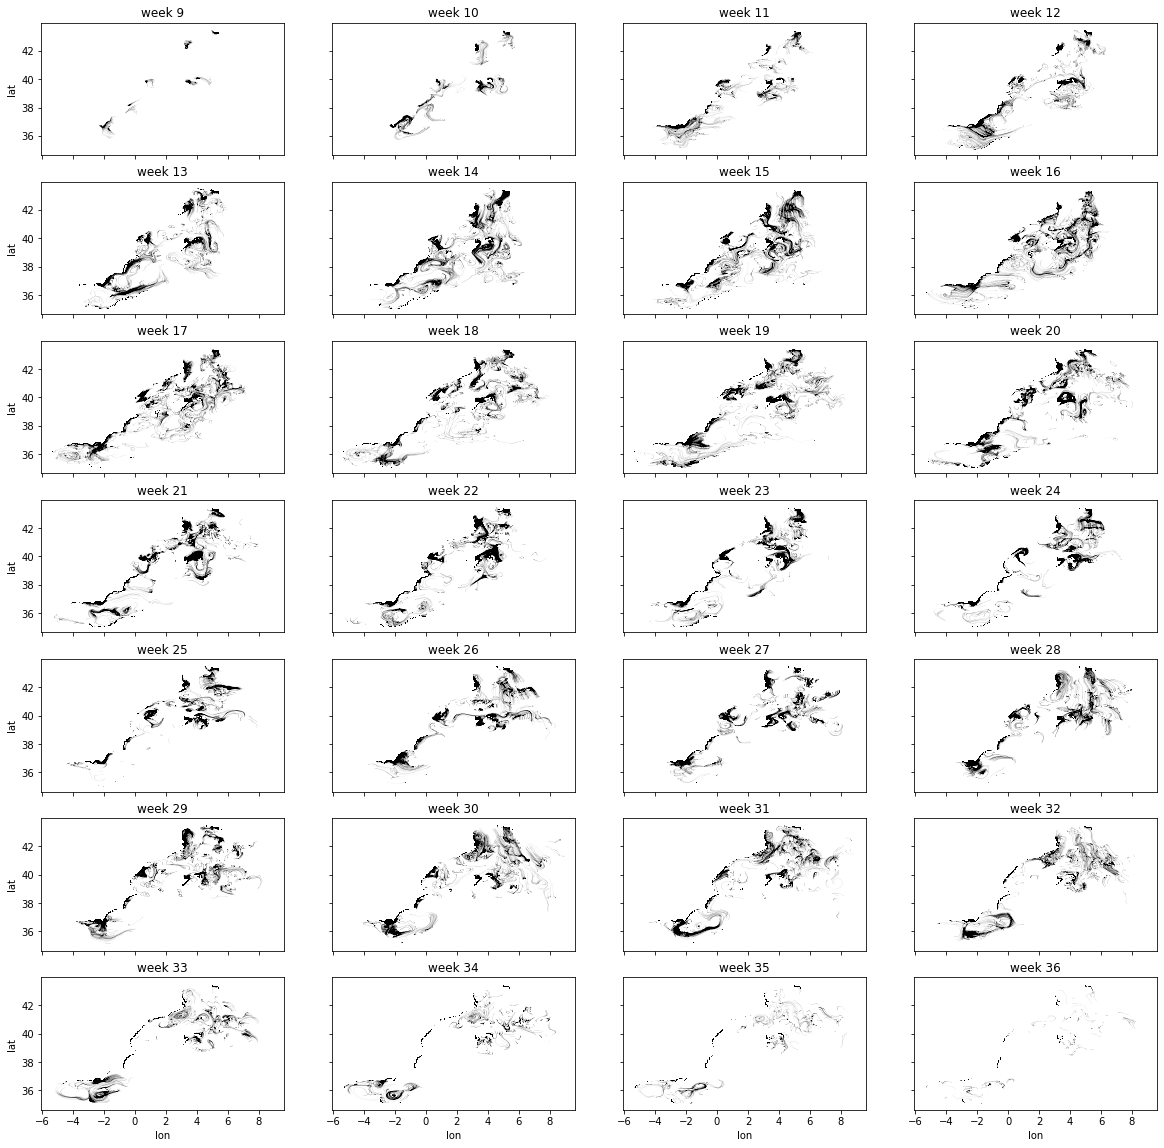

In [11]:
fig, ax = plt.subplots(n_weeks // 4, 4, figsize=(20, 20), sharex=True, sharey=True)

for _ax, (_wk, _group) in zip(tqdm.tqdm(ax.flatten()), data_frame.groupby(weeks)):
    _group.plot.scatter(
        x="lon", y="lat", c="k", s=1, alpha=0.005, ax=_ax,
    )
    _ax.set_title(f"week {_wk}")

### Individual trajectories POV

Let's pick the longest trajectory.

In [13]:
longest_traj_id = data_frame.groupby("traj")["distance"].max().argmax()
longest_traj = data_frame.set_index(["traj", "time"]).loc[longest_traj_id]
longest_traj

,obs,MPA,distance,land,lat,lon,temp,z
time,,,,,,,,
2017-03-29 00:00:00,0,9.0,0.000000,0.0,36.653313,-2.103508,15.652813,1.018237
2017-03-29 01:00:00,1,9.0,0.241552,0.0,36.652160,-2.101208,15.655774,1.018237
2017-03-29 02:00:00,2,9.0,0.477195,0.0,36.650970,-2.099016,15.658932,1.018237
2017-03-29 03:00:00,3,9.0,0.704855,0.0,36.649780,-2.096935,15.662065,1.018237
2017-03-29 04:00:00,4,9.0,0.924654,0.0,36.648590,-2.094962,15.665154,1.018237
...,...,...,...,...,...,...,...,...
2017-05-07 21:00:00,957,0.0,1132.695000,0.0,36.308544,-3.605045,17.219172,1.018237
2017-05-07 22:00:00,958,0.0,1134.240800,0.0,36.304020,-3.588701,17.220768,1.018237
2017-05-07 23:00:00,959,0.0,1135.796400,0.0,36.299427,-3.572274,17.205555,1.018237


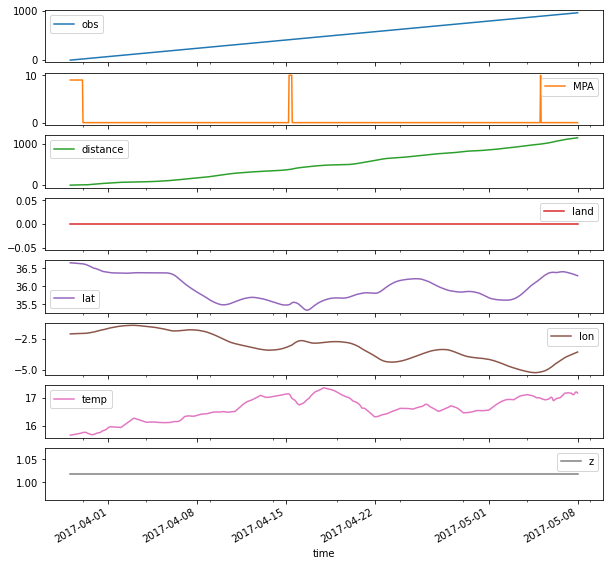

In [14]:
longest_traj.plot(subplots=True, figsize=(10, 10));

What about anomalously fast movement (diag by diff of distance)?

<AxesSubplot:xlabel='time'>

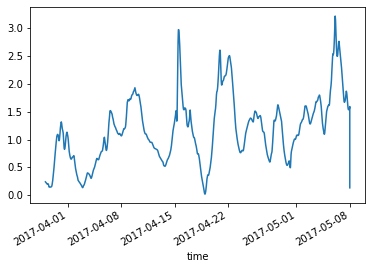

In [15]:
longest_traj["distance"].diff().plot()

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

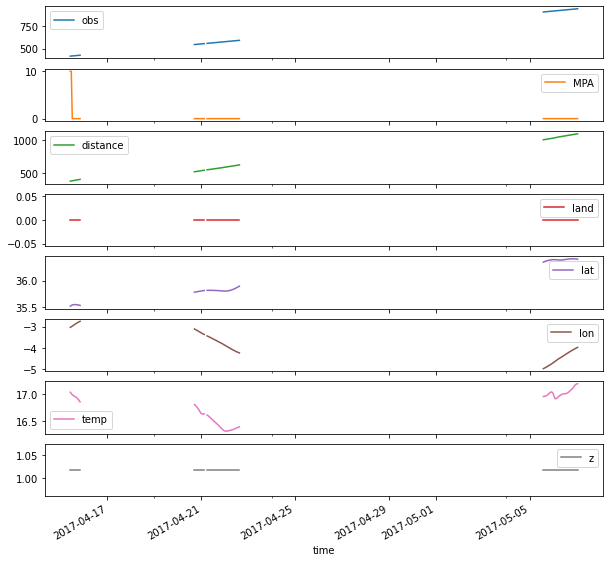

In [16]:
longest_traj.where(longest_traj["distance"].diff() > 2.0).plot(subplots=True, figsize=(10, 10))